# Imports

In [47]:
import os, sys, json

# Determine project root (parent of notebooks directory)
current_dir = os.path.abspath(os.getcwd())
# If running from project root, notebooks/ may not be in path; handle both cases
if os.path.basename(current_dir).lower() == "notebooks":
    project_root = os.path.abspath(os.path.join(current_dir, ".."))
else:
    # Assume we launched from project root already
    project_root = current_dir

src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.insert(0, src_path)

try:
    from networks import SpikingNetwork
except ModuleNotFoundError as e:
    raise RuntimeError(f"Failed to import SpikingNetwork from {src_path}: {e}")
try:
    from connections import *
except ModuleNotFoundError as e:
    raise RuntimeError(f"Failed to import connections from {src_path}: {e}")

# Load config file robustly
config_path = os.path.join(project_root, "configs", "izhikevich_base.json")
config_path = os.path.join(project_root, "configs", "baseline_lif.json")
with open(config_path, "r") as f:
    config = json.load(f)
print("Loaded config from", config_path)
import torch

Loaded config from c:\Users\Work\VSCodeProjects\spiking-network-info-transmission\configs\baseline_lif.json


# Create weight matrices & network

In [48]:
net = SpikingNetwork(config)
ff1 = connect_random(config["n_inputs"], config["n_layer_one"])
ff2 = connect_random(config["n_layer_one"], config["n_layer_two"])
ff3 = connect_random(config["n_layer_two"], config["n_layer_three"])
rec1 = create_clustered_connection_with_density(n_neurons=config["n_layer_one"], cluster_size=config["cluster_size"]) + connect_random(config["n_layer_one"], config["n_layer_one"], p=config["noise_level"])
rec2 = create_clustered_connection_with_density(n_neurons=config["n_layer_two"], cluster_size=config["cluster_size"]) + connect_random(config["n_layer_one"], config["n_layer_one"], p=config["noise_level"])
rec3 = create_clustered_connection_with_density(n_neurons=config["n_layer_three"], cluster_size=config["cluster_size"]) + connect_random(config["n_layer_one"], config["n_layer_one"], p=config["noise_level"])

net.add_weights(ff1, rec1, ff2, rec2, ff3, rec3)
net.build()

No learning for feedforward connections.


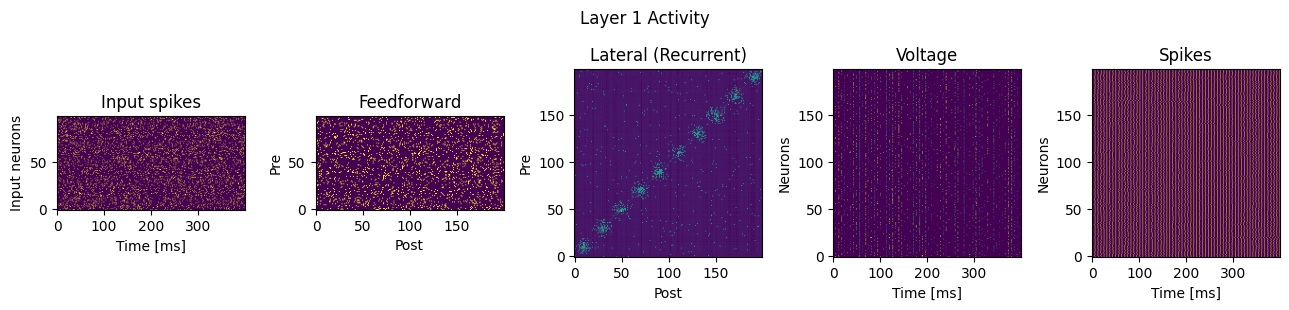

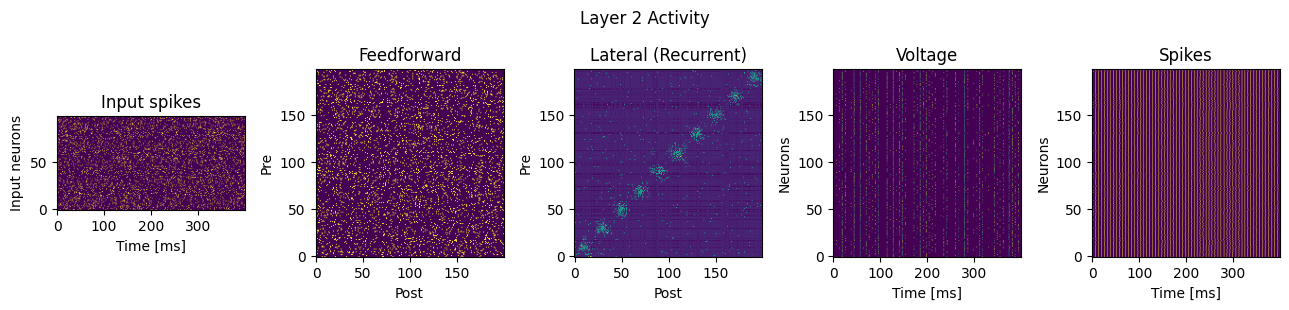

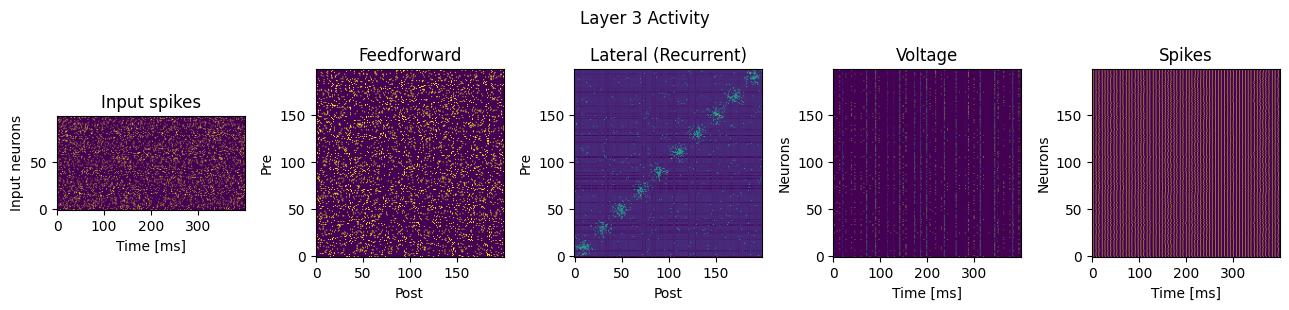

In [53]:
input_data = torch.bernoulli(0.1 * torch.ones(config["time"], config["n_inputs"])).byte() * 10
net.run(input_data)
for i in range(1, 4):
    net.plot(layer=i)

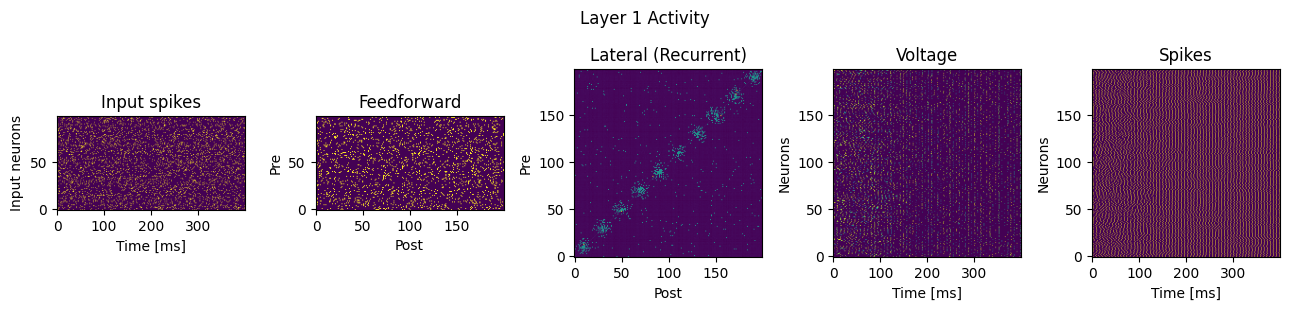

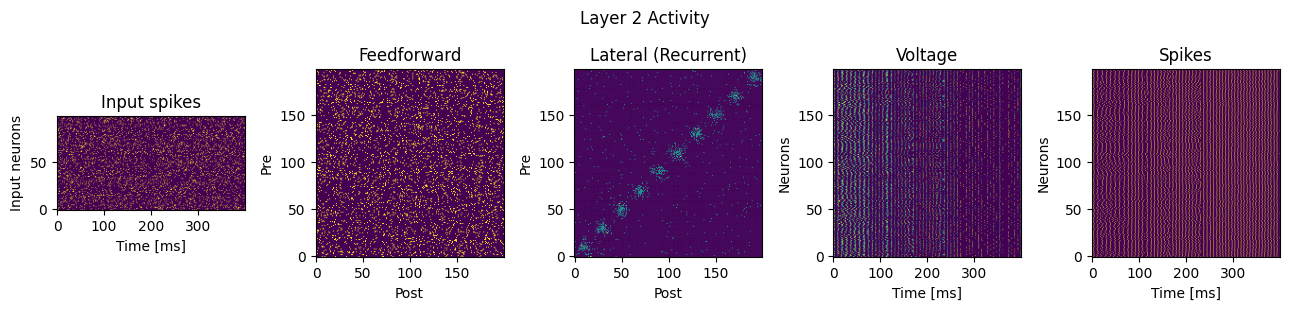

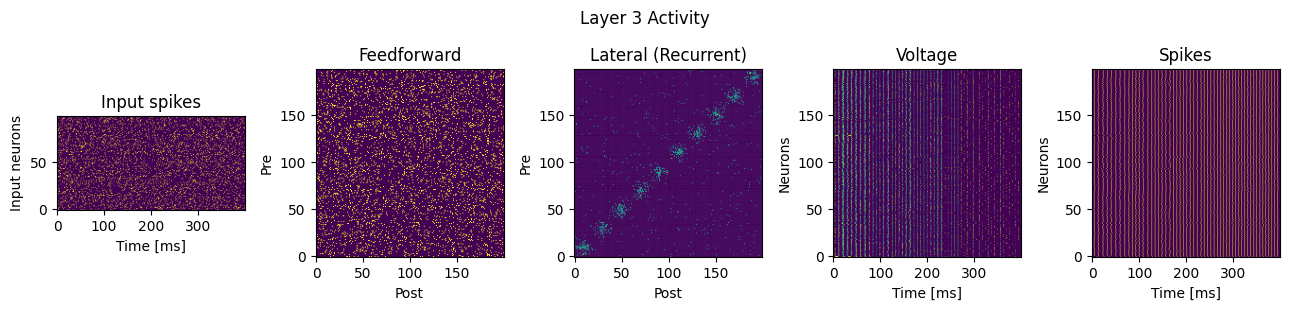

In [50]:
for i in range(1, 4):
    net.plot(layer=i)